Тема аттестационной работы: разработка веб-приложения для опеределения качества молока с использованием машинного обучения.

Цель исследования: повышение эффективности (оптимизация) лабораторных исследований в части определения уровня качества молока с использованием машинного обучения в промышленности.

Название датасета - качество молока
Используется алгоритм классического машинного обучения Catboost (класиификация).

О наборе данных.
Текущий набор данных собирается вручную на основе наблюдений. Это помогает создавать модели машинного обучения для прогнозирования качества молока.
Набор данных состоит из 7 независимых переменных:
 - кислотности (ph);
 - температуры (temperature);
 - вкуса (taste);
 - запаха (odor);
 - жира (fat);
 - мутности (turbidity);
 - цвета (color).
Сорт или качество молока зависит от этих параметров.
Вышеуказанные параметры играют важную роль при определении качества молока молока.

Целевой переменной является сорт молока, определяющий его качество.
Результатом классификации качества молока могут быть следующие значения:
- непригодное;
- умеренное;
- высокое.

Если вкус, запах, жир и мутность удовлетворяют оптимальным условиям, им присваивается 1, в противном случае — 0.
Для оптимизации данные категориальные признаки не будут участвовать в задаче классификации.

Фактические значения температуры и pH указаны в наборе данных.

Нам необходимо выполнить предварительную обработку данных и методы увеличения данных для построения статистических и прогнозных моделей для прогнозирования качества молока.



Импорт требуемых для данного исследования библиотек.

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from catboost import CatBoostClassifier

Импорт датасета.

In [128]:
milk_training_data = pd.read_csv('milk_training_data.csv', delimiter=',')

Просмотр заголовков и примера данных на нескольких кортежах.

In [129]:
print(milk_training_data.head())

    pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0  6.6          35      1     0     1          0     254    high
1  6.6          36      0     1     0          1     253    high
2  8.5          70      1     1     1          1     246     low
3  9.5          34      1     1     0          1     255     low
4  6.6          37      0     0     0          0     255  medium


Исправление ошибок в заголовках столбцов с данными.

In [130]:
milk_training_data.rename(columns={'Colour':'Color'}, inplace = True)
milk_training_data.rename(columns={'Temprature':'Temperature'}, inplace = True)
milk_training_data.rename(columns={'Fat ':'Fat'}, inplace = True)

Приведение к нижнему регистру.

In [131]:
milk_training_data.columns = [col.lower() for col in milk_training_data.columns]

Просмотр информации о датасете:
- проверка наличия пустых значений;
- определение количество строк и столбцов датасета;
- определение типов данных в столбцах.

In [132]:
print(milk_training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ph           1059 non-null   float64
 1   temperature  1059 non-null   int64  
 2   taste        1059 non-null   int64  
 3   odor         1059 non-null   int64  
 4   fat          1059 non-null   int64  
 5   turbidity    1059 non-null   int64  
 6   color        1059 non-null   int64  
 7   grade        1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB
None


Определение уникальных значений столбцов датасета.

In [133]:
for col in milk_training_data:
 print(milk_training_data[col].unique (), "\n")

[6.6 8.5 9.5 5.5 4.5 8.1 6.7 5.6 8.6 7.4 6.8 6.5 4.7 3.  9.  6.4] 

[35 36 70 34 37 45 60 66 50 55 90 38 40 43 42 41 65] 

[1 0] 

[0 1] 

[1 0] 

[0 1] 

[254 253 246 255 250 247 245 240 248] 

['high' 'low' 'medium'] 



Просмотр метрик датасета.

In [134]:
milk_training_data.describe(percentiles=[0.1, 0.25,0.5, 0.75, 0.9]).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
ph,1059.0,6.630123,1.399679,3.0,4.5,6.5,6.7,6.8,8.6,9.5
temperature,1059.0,44.226629,10.098364,34.0,36.0,38.0,41.0,45.0,55.0,90.0
taste,1059.0,0.546742,0.498046,0.0,0.0,0.0,1.0,1.0,1.0,1.0
odor,1059.0,0.432483,0.495655,0.0,0.0,0.0,0.0,1.0,1.0,1.0
fat,1059.0,0.671388,0.469930,0.0,0.0,0.0,1.0,1.0,1.0,1.0
turbidity,1059.0,0.491029,0.500156,0.0,0.0,0.0,0.0,1.0,1.0,1.0
color,1059.0,251.840415,4.307424,240.0,245.0,250.0,255.0,255.0,255.0,255.0


Распредение данных в зависмости от значений качества молока.

In [135]:
milk_training_data.groupby('grade').size()

grade
high      256
low       429
medium    374
dtype: int64

Распределение значений кислотности.

In [136]:
milk_training_data.groupby('ph').size()

ph
3.0     70
4.5     37
4.7     20
5.5     23
5.6     19
6.4      1
6.5    189
6.6    159
6.7     82
6.8    249
7.4     39
8.1     24
8.5     22
8.6     40
9.0     61
9.5     24
dtype: int64

<Axes: xlabel='ph', ylabel='count'>

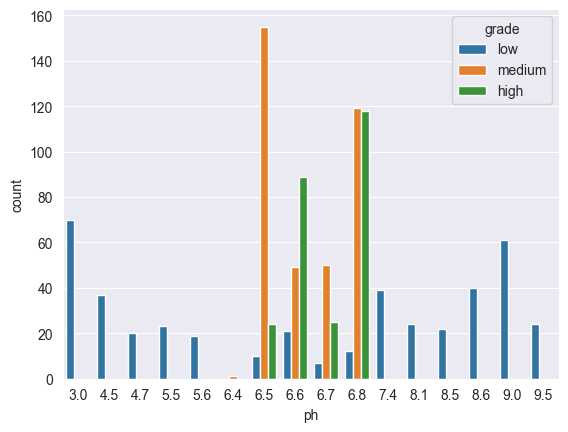

In [137]:
sns.countplot(x=milk_training_data['ph'],hue=milk_training_data['grade'], palette = "tab10")

Распределение значений температуры.

<Axes: xlabel='temperature', ylabel='count'>

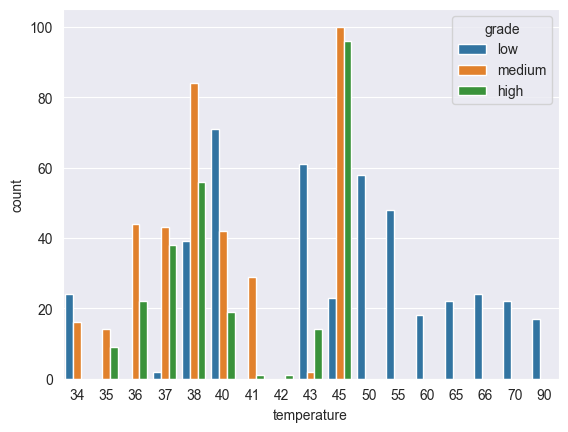

In [138]:
sns.countplot(x=milk_training_data['temperature'],hue=milk_training_data['grade'], palette = "tab10")

Распределение значений цвета.

<Axes: xlabel='color', ylabel='count'>

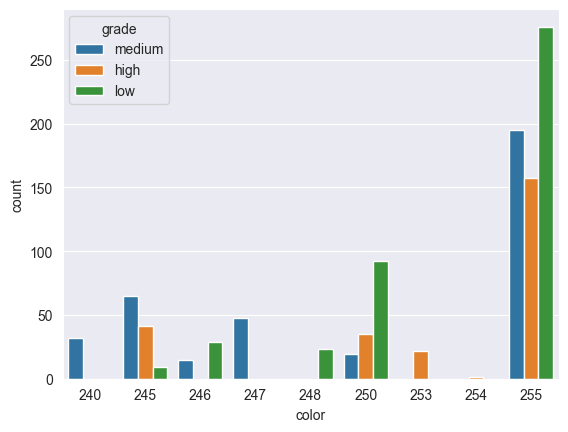

In [139]:
sns.countplot(x=milk_training_data['color'], hue=milk_training_data['grade'], palette="tab10")

Приведение категориального признака к числовову виду для определения корреляции между данными.

In [140]:
milk_training_data['grade']=milk_training_data['grade'].map({'low':0,'medium':1,'high':2})
milk_training_data.head()

,ph,temperature,taste,odor,fat,turbidity,color,grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


Определение корреляции между данными. Прямые зависимости между параметрами отсутствуют.

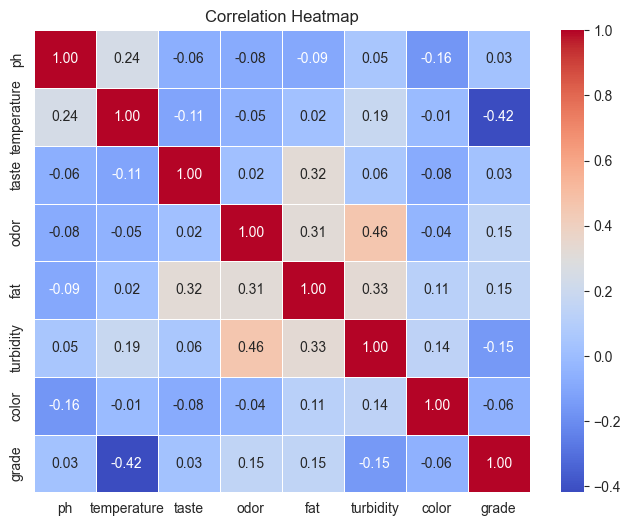

In [141]:
plt.figure(figsize=(8, 6))
sns.heatmap(milk_training_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Кислотность – один из основных показателей качества молока, определяемых при приемке. В соответствии с требованиями ТР ТС 033/2013 «О безопасности молока и молочной продукции» кислотность принимаемого на переработку молока должна быть в пределах от 16 до 21°Т.

Активная (pH) И титруемая (°Т) кислотность
Активная кислотность характеризует количество ионов водорода и выражается в pH. Однако, согласно требованиям ГОСТ, для молока необходимо определять титруемую кислотность, которая выражается в градусах Тернера. Ее определяют путем титрования 100 мл молока раствором щелочи в присутствии индикатора фенолфталеина. Ниже приведено соотношение средних значениний активной клислотности (pH) к значениям титруемой кислотности в °Т.

Среднее значение активной кислотности (pH)	Титруемая кислотность (⁰Т)
             6,73	                                    16
             6,69	                                    17
             6,64	                                    18
             6,58	                                    19
             6,52	                                    20
             6,46	                                    21
             6,41	                                    22
             6,36	                                    23
             6,31	                                    24

Так как принято отбраковывать партии молокая по титруемой кислотности, то добавлен столбец данных со значениями титруемой кислотности. Также это решает задачу необходимости типа данных interger для машинного обучения с помощью библиотеки "Catboost".
Ниже приведены критерии обраковки молока по титруемой кислотности.

Высший сорт	    Первый сорт	    Второй сорт
16-17 (⁰Т)	      ≤19 (⁰Т)	      ≤20 (⁰Т)

In [142]:
t_list = []
t=(16,17,19,20,21)
t

(16, 17, 19, 20, 21)

In [143]:
ph = milk_training_data['ph'].to_numpy()

In [144]:
for i in range(len(ph)):
    if ph[i] < 6.5 or ph[i] > 6.8: t_list.insert(i, t[4])
    if ph[i] == 6.5: t_list.insert(i, t[3])
    if ph[i] == 6.6: t_list.insert(i, t[2])
    if ph[i] == 6.7: t_list.insert(i, t[1])
    if ph[i] == 6.8: t_list.insert(i, t[0])

In [145]:
milk_training_data['t'] = t_list

Проверка наличия добавленного столбца со значениями титруемой кислотности.

In [146]:
milk_training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ph           1059 non-null   float64
 1   temperature  1059 non-null   int64  
 2   taste        1059 non-null   int64  
 3   odor         1059 non-null   int64  
 4   fat          1059 non-null   int64  
 5   turbidity    1059 non-null   int64  
 6   color        1059 non-null   int64  
 7   grade        1059 non-null   int64  
 8   t            1059 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 74.6 KB


Повторная проверка наличия прямой зависимости между данными.

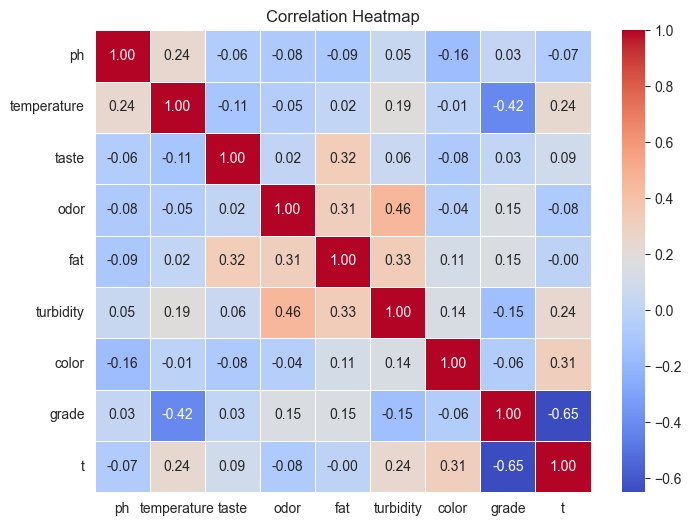

In [147]:
plt.figure(figsize=(8, 6))
sns.heatmap(milk_training_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Деление датасета на тестувую и учебную выборки. Удаление неиспользуемых признаков.

In [159]:
X = milk_training_data.drop(['grade', 'taste','odor', 'fat', 'turbidity'], axis=1)
y = milk_training_data['grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1234)

В качестве категориальных признаков выбраны:
- температура (temperature);
- цвет (color);
- титруемая кислотность (t).

In [160]:
cat_features = ['temperature', 'color', 't']

Преобразование типа данных категориальных признаков.

In [161]:
for feature in cat_features:
    milk_training_data[feature] = milk_training_data[feature].astype('category')

Обучение модели CatBoostClassifier

In [162]:
model_milk_grade = CatBoostClassifier(iterations=300, depth=4, learning_rate=0.1, cat_features=cat_features)
model_milk_grade.fit(X_train, y_train)

0:	learn: 1.0081202	total: 10.1ms	remaining: 3.02s
1:	learn: 0.9393685	total: 38.8ms	remaining: 5.77s
2:	learn: 0.8745148	total: 63.2ms	remaining: 6.25s
3:	learn: 0.8183599	total: 89.5ms	remaining: 6.63s
4:	learn: 0.7715693	total: 114ms	remaining: 6.75s
5:	learn: 0.7342719	total: 136ms	remaining: 6.67s
6:	learn: 0.7010950	total: 153ms	remaining: 6.38s
7:	learn: 0.6662090	total: 179ms	remaining: 6.55s
8:	learn: 0.6356388	total: 207ms	remaining: 6.69s
9:	learn: 0.6096110	total: 229ms	remaining: 6.64s
10:	learn: 0.5866336	total: 250ms	remaining: 6.57s
11:	learn: 0.5648743	total: 284ms	remaining: 6.81s
12:	learn: 0.5435347	total: 303ms	remaining: 6.69s
13:	learn: 0.5194566	total: 322ms	remaining: 6.58s
14:	learn: 0.5014615	total: 340ms	remaining: 6.47s
15:	learn: 0.4838919	total: 362ms	remaining: 6.42s
16:	learn: 0.4713437	total: 380ms	remaining: 6.33s
17:	learn: 0.4596413	total: 398ms	remaining: 6.23s
18:	learn: 0.4483394	total: 431ms	remaining: 6.37s
19:	learn: 0.4356761	total: 449ms	rem

Предсказание на тестовом наборе.

In [163]:
y_pred = model_milk_grade.predict(X_test)

Оценка точности модели

In [164]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy*100} %")

Точность модели: 92.68867924528303 %


In [165]:
f1_score(y_test, y_pred, average='macro')

0.9123499843369719

Сохранение обученной на тестовых данных модели

In [166]:
model_milk_grade.save_model('model_milk_grade.cbm')

Для проверки модели используются две функции:
- функция ph_to_t для преобразования активной кислотности в титруемую;
- функция классификации молока по входным параметрам:
    - активная кислотность;
    - температура;
    - цвет.

In [156]:
def ph_to_t(b):
    t1=(16,17,19,20,21)
    if b < 6.5 or b > 6.8: c=t1[4]
    if b == 6.5: c=t1[3]
    if b == 6.6: c= t1[2]
    if b == 6.7: c=t1[1]
    if b == 6.8: c=t1[0]
    return c


In [157]:
def forecast_milk_grade(ph:float, temperature:int, color:int):
    new_milk_grade = pd.DataFrame({'ph': [ph], 'temperature': [temperature], 'color': [color]})
    new_milk_grade['ph'] = new_milk_grade['ph'].astype('float')
    a=new_milk_grade.iloc[[0],[0]]
    b=a['ph'].squeeze()
    print(b)
    new_milk_grade['t'] = ph_to_t(b)
    print(new_milk_grade.info())
    print(new_milk_grade.head())
    model_milk_grade = CatBoostClassifier()
    model_milk_grade.load_model('model_milk_grade.cbm')
    forecast = model_milk_grade.predict(new_milk_grade)[0]
    if forecast == 0: result = "непригодное"
    if forecast == 1: result = "умеренное"
    if forecast == 2: result = "высокое"
    return print(f"Прогноз качества молока: {result}")

Вызов функция классификации молока для тестирования модели.

In [158]:
forecast_milk_grade(6.8, 45, 255)

6.8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ph           1 non-null      float64
 1   temperature  1 non-null      int64  
 2   color        1 non-null      int64  
 3   t            1 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 160.0 bytes
None
    ph  temperature  color   t
0  6.8           45    255  16
Прогноз качества молока: высокое


Необходимо добавить ограничение на входные параметры:
Температура > 34
Цвет > 243